# LIBRARIES

This section imports all the necessary Python libraries required throughout the project:

- **pandas**: For data manipulation and analysis (e.g., reading datasets, working with dataframes).
- **numpy**: For numerical operations and array handling.
- **matplotlib.pyplot** and **seaborn**: For data visualization, enabling plots like bar charts, histograms, and heatmaps.
- **sklearn** modules: For building machine learning models, preprocessing data, splitting datasets, and evaluating performance.

By importing all required libraries at the start, we ensure the rest of the code runs efficiently without interruption.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# DATA SET

In this section, we load the dataset that will be used for analysis and modeling.

- The dataset is typically read into a **pandas DataFrame** using functions like `pd.read_csv()`.
- After loading, we may display the first few rows using `head()` to get a quick look at the structure and contents.
- This step helps verify that the data has been imported correctly and gives a preliminary view of the features (columns) and data types.

Understanding the dataset at this stage is crucial for effective preprocessing and modeling later.

In [2]:
df = pd.read_csv("small_employee_attrition.csv")
df

,Age,MonthlyIncome,DistanceFromHome,YearsAtCompany,NumCompaniesWorked,PercentSalaryHike,TrainingTimesLastYear,WorkLifeBalance,JobSatisfaction,Attrition_rate
0,50,8056,3,31,9,14,0,3,2,0
1,36,17948,19,22,4,12,0,1,2,0
2,29,11110,16,32,6,21,5,2,1,1
3,42,16773,16,2,3,18,4,3,2,0
4,40,3502,3,17,0,13,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
95,58,8423,28,29,6,23,4,1,3,0
96,56,17589,1,4,3,18,5,4,4,1
97,43,10158,20,11,2,24,3,4,3,0
98,48,13248,29,15,9,21,0,4,3,1


In [3]:
df.head()
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    100 non-null    int64
 1   MonthlyIncome          100 non-null    int64
 2   DistanceFromHome       100 non-null    int64
 3   YearsAtCompany         100 non-null    int64
 4   NumCompaniesWorked     100 non-null    int64
 5   PercentSalaryHike      100 non-null    int64
 6   TrainingTimesLastYear  100 non-null    int64
 7   WorkLifeBalance        100 non-null    int64
 8   JobSatisfaction        100 non-null    int64
 9   Attrition_rate         100 non-null    int64
dtypes: int64(10)
memory usage: 7.9 KB


Age                       36
MonthlyIncome            100
DistanceFromHome          27
YearsAtCompany            36
NumCompaniesWorked        10
PercentSalaryHike         15
TrainingTimesLastYear      6
WorkLifeBalance            4
JobSatisfaction            4
Attrition_rate             2
dtype: int64

# STEP 1: DATA COLLECTION AND UNDERSTANDING

In this step, we perform an initial exploration of the dataset to understand its structure and contents.

Key activities typically include:
- **Viewing dataset shape** (rows and columns) to understand its size.
- **Inspecting column names and data types** to identify features and their types (e.g., numerical, categorical).
- **Checking for missing values or duplicates**, which may require cleaning.
- **Using descriptive statistics** (`describe()`, `info()`) to summarize distributions, ranges, and potential outliers.
- **Visualizing relationships** between variables using plots like histograms, boxplots, or correlation heatmaps.

This foundational understanding helps inform decisions for preprocessing and feature engineering.


Loading data...

 Data Preview:
    Age  MonthlyIncome  DistanceFromHome  YearsAtCompany  NumCompaniesWorked  \
0   50           8056                 3              31                   9   
1   36          17948                19              22                   4   
2   29          11110                16              32                   6   
3   42          16773                16               2                   3   
4   40           3502                 3              17                   0   

   PercentSalaryHike  TrainingTimesLastYear  WorkLifeBalance  JobSatisfaction  \
0                 14                      0                3                2   
1                 12                      0                1                2   
2                 21                      5                2                1   
3                 18                      4                3                2   
4                 13                      5                1                1   

   A

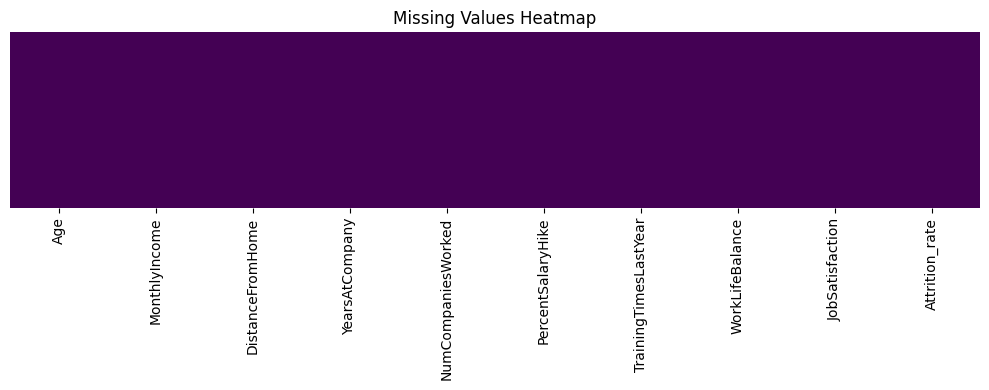

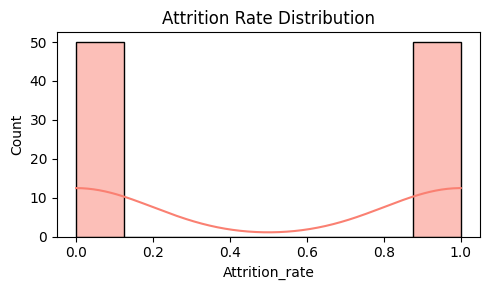

In [4]:
class DataIngestor:
    def __init__(self, path):
        self.path = path

    def load_data(self):
        print("\nLoading data...")
        try:
            df = pd.read_csv(self.path)

            print("\n Data Preview:\n", df.head())
            print("\nData Info:")
            print(df.info())
            print("\nData Description:\n", df.describe())


            plt.figure(figsize=(10, 4))
            sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
            plt.title("Missing Values Heatmap")
            plt.tight_layout()
            plt.show()

            
            cat_cols = df.select_dtypes(include='object').columns
            for col in cat_cols:
                plt.figure(figsize=(6, 3))
                sns.countplot(data=df, x=col, palette='Set2')
                plt.title(f"Distribution of {col}")
                plt.xticks(rotation=30)
                plt.tight_layout()
                plt.show()

        
            if 'Attrition_rate' in df.columns:
                plt.figure(figsize=(5, 3))
                sns.histplot(df['Attrition_rate'], kde=True, color='salmon')
                plt.title("Attrition Rate Distribution")
                plt.tight_layout()
                plt.show()
            return df

        except FileNotFoundError:
            print(f"File not found at path: {self.path}")
            return None


ingestor = DataIngestor("small_employee_attrition.csv")
df = ingestor.load_data()


# STEP 2: DATA PREPROCESSING

This step involves preparing the raw dataset for modeling by cleaning and transforming the data.

Common preprocessing tasks include:
- **Handling missing values**: Filling them with mean/median/mode, or dropping rows/columns.
- **Encoding categorical variables**: Converting text labels into numeric format using techniques like label encoding or one-hot encoding.
- **Normalizing or scaling** features: Ensuring numerical features are on the same scale (important for many ML algorithms).
- **Removing duplicates or irrelevant features** that don’t contribute to the prediction task.
- **Feature engineering**: Creating new relevant features from existing data to improve model performance.

Effective preprocessing improves model accuracy, stability, and generalization to new data.



Preprocessing data...
Dropped 0 rows with missing values.

Univariate Analysis:


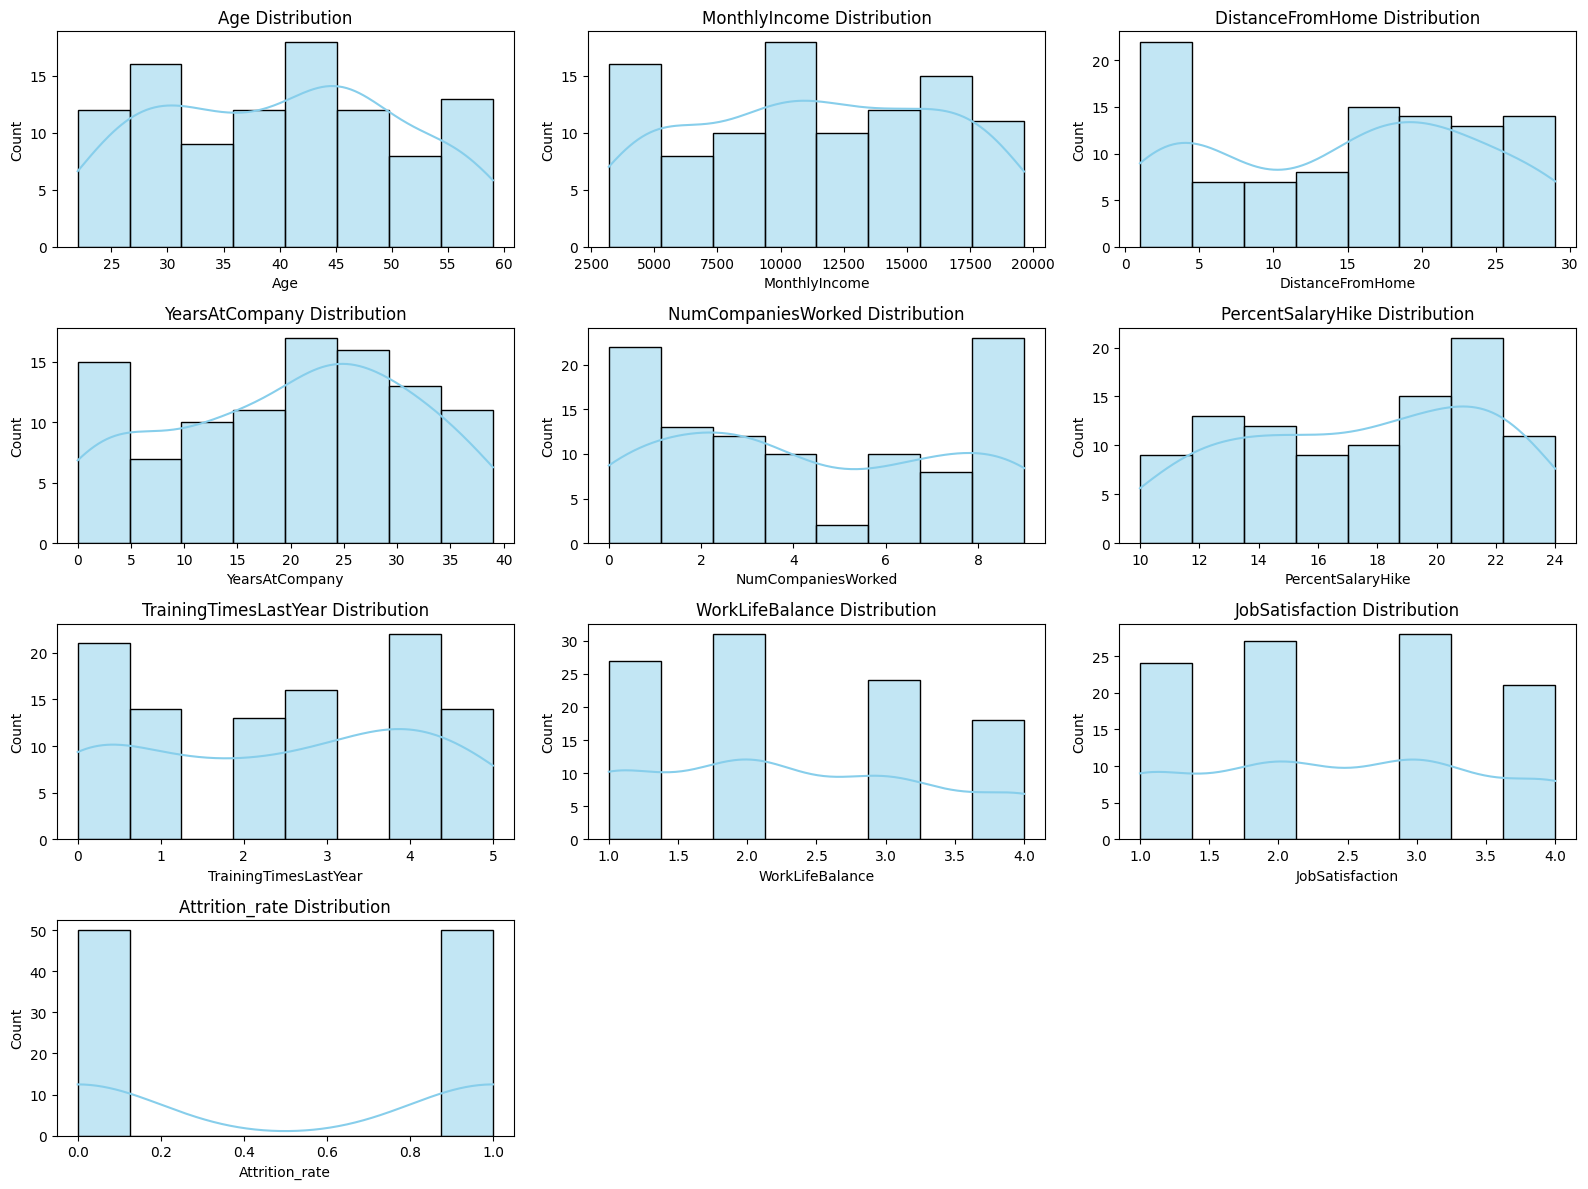

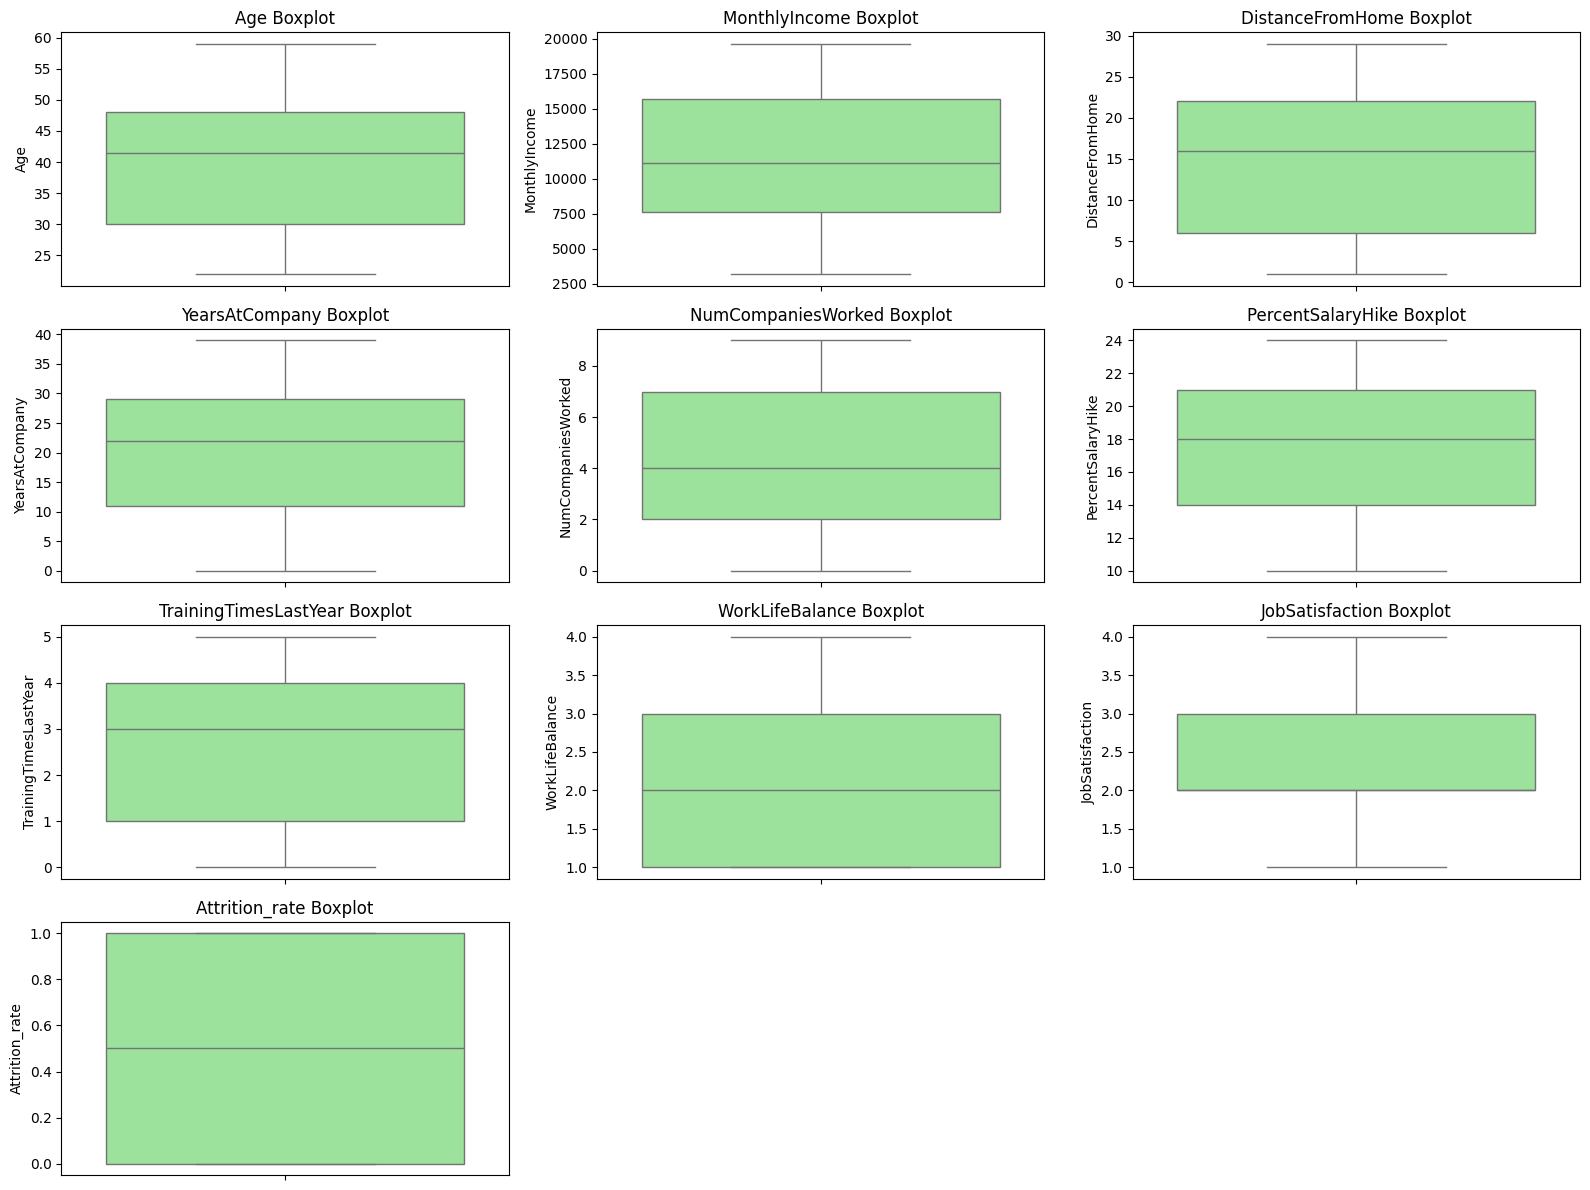


Bivariate Analysis:


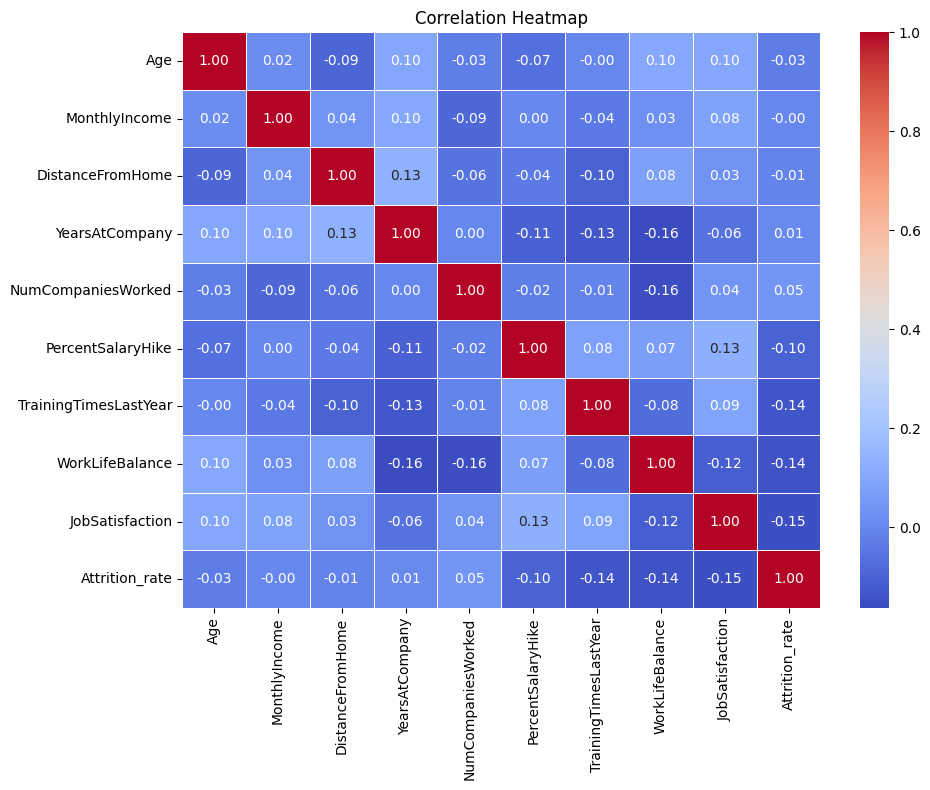


Pairplot of top correlated features: ['YearsAtCompany', 'NumCompaniesWorked', 'WorkLifeBalance']


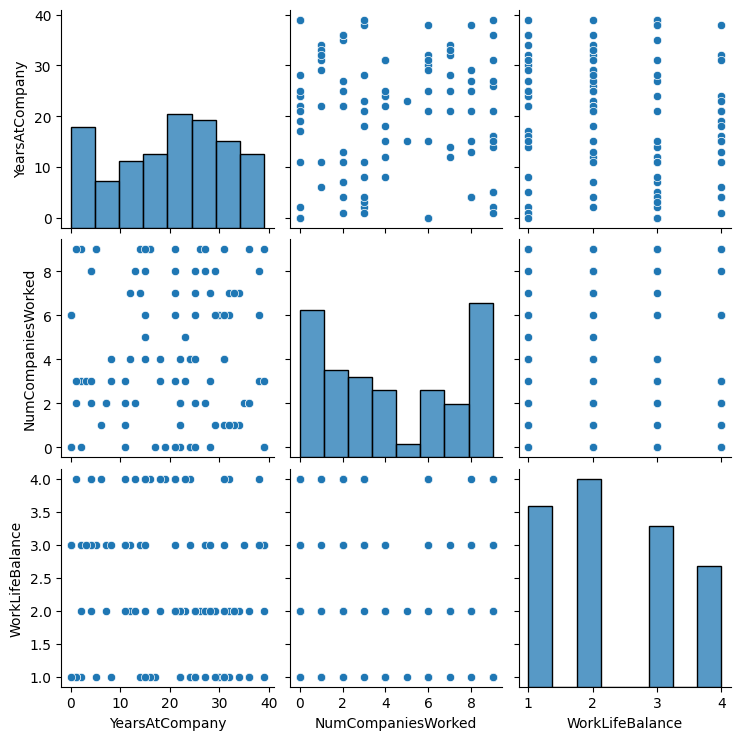

In [5]:
class DataPreprocessor:
    def __init__(self, dataframe: pd.DataFrame):
        self.df = dataframe.copy()

    def preprocess(self):
        print("\nPreprocessing data...")
        before_rows = self.df.shape[0]
        self.df.dropna(inplace=True)
        after_rows = self.df.shape[0]
        print(f"Dropped {before_rows - after_rows} rows with missing values.")
        return self.df

    def univariate_analysis(self):
        print("\nUnivariate Analysis:")

        numeric_cols = self.df.select_dtypes(include=np.number).columns.tolist()
        cat_cols = self.df.select_dtypes(include='object').columns.tolist()

        
        plt.figure(figsize=(16, 12))
        for i, col in enumerate(numeric_cols):
            plt.subplot(4, 3, i + 1)
            sns.histplot(self.df[col], kde=True, color="skyblue")
            plt.title(f"{col} Distribution")
        plt.tight_layout()
        plt.show()

        
        plt.figure(figsize=(16, 12))
        for i, col in enumerate(numeric_cols):
            plt.subplot(4, 3, i + 1)
            sns.boxplot(y=self.df[col], color="lightgreen")
            plt.title(f"{col} Boxplot")
        plt.tight_layout()
        plt.show()

        
        for col in cat_cols:
            plt.figure(figsize=(6, 4))
            sns.countplot(x=self.df[col], palette="pastel")
            plt.title(f"{col} Count")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    def bivariate_analysis(self):
        print("\nBivariate Analysis:")

        numeric_cols = self.df.select_dtypes(include=np.number).columns.tolist()


        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()

        
        if len(numeric_cols) >= 2:
            top_corr = self.df[numeric_cols].corr().abs().unstack().sort_values(ascending=False)
            top_pairs = [(a, b) for a, b in top_corr.index if a != b][:4]
            top_features = list(set([item for pair in top_pairs for item in pair]))

            print(f"\nPairplot of top correlated features: {top_features}")
            sns.pairplot(self.df[top_features])
            plt.show()


df = pd.read_csv("small_employee_attrition.csv")

processor = DataPreprocessor(df)

clean_df = processor.preprocess()

processor.univariate_analysis()
processor.bivariate_analysis()